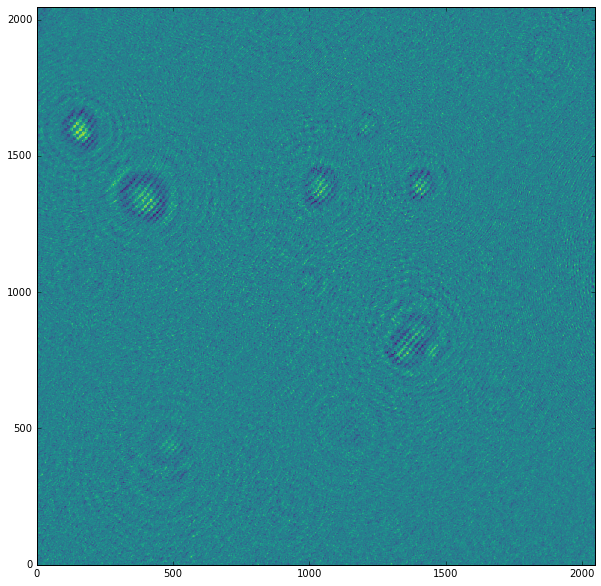

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import numpy as np
import matplotlib.pyplot as plt

holo_cube = np.load('../shampoo/holo_cube.npy')
med = np.load('../shampoo/median.npy')

kwargs = dict(origin='lower', interpolation='nearest',
              cmap=plt.cm.viridis)

%matplotlib inline
def plot(array):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(array, **kwargs)
    plt.show()
h105 = holo_cube[104] - med
plot(h105)

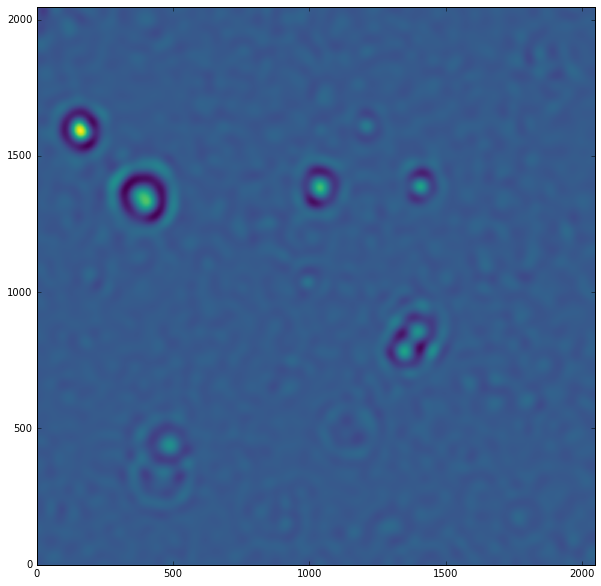

In [2]:
from pyfftw.interfaces.scipy_fftpack import fft2, ifft2
from astropy.convolution import convolve_fft, MexicanHat2DKernel, Gaussian2DKernel, Ring2DKernel
from scipy.ndimage import gaussian_filter

conv_small = convolve_fft(h105, MexicanHat2DKernel(25), fftn=fft2, ifftn=ifft2)

plot(conv_small)

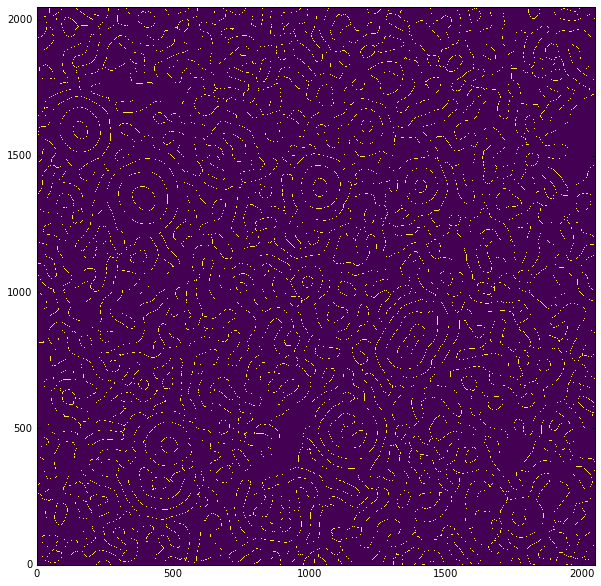

In [6]:
from skimage.feature import canny
edges = canny((conv_small - np.median(conv_small))/conv_small.std())
plot(edges)

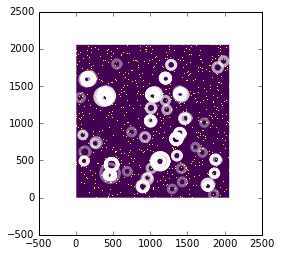

In [15]:
from skimage.transform import hough_circle
n_points = 30

radii = np.linspace(50, 200, 150, dtype=int)
res = hough_circle(edges, radii) # , full_output=True, normalize=False)

args = np.argsort(res.ravel())[::-1][:500]
inds = [np.unravel_index(arg, res.shape) for arg in args]

plt.imshow(edges, **kwargs)

for ridx_i, r_i, c_i in inds:
    c_r = radii[ridx_i]*np.ones(n_points)
    c_t = np.linspace(0, 2*np.pi, 30)
    c_x = c_r*np.cos(c_t) + c_i
    c_y = c_r*np.sin(c_t) + r_i
    plt.plot(c_x, c_y, color='w', lw=3, alpha=0.4)

(0, 2048)

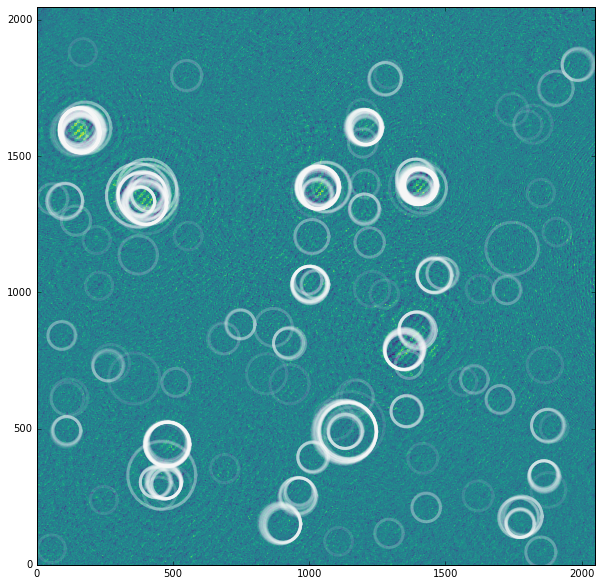

In [17]:
plt.figure(figsize=(10,10))

args = np.argsort(res.ravel())[::-1][:1000]
inds = [np.unravel_index(arg, res.shape) for arg in args]

plt.imshow(h105, **kwargs)

for ridx_i, r_i, c_i in inds:
    c_r = radii[ridx_i]*np.ones(n_points)
    c_t = np.linspace(0, 2*np.pi, 30)
    c_x = c_r*np.cos(c_t) + c_i
    c_y = c_r*np.sin(c_t) + r_i
    plt.plot(c_x, c_y, color='w', lw=3, alpha=0.1)
    
plt.xlim([0, 2048])
plt.ylim([0, 2048])